## Importing Packages

In [12]:
import pandas as pd

## Reading data

In [13]:
df = pd.read_csv("data.csv")
df.drop(columns=["switching_carries", "Do you think", "Timestamp"], inplace=True)
df.head()

,email,has_5g_phone,phone_model,carrier,5g_acads,5g_labs,5g_hostel,5g_got_better,switching_acads,switching_labs,switching_hostel,hostel,satisfaction,download_speed
0,ec21b1057@iiitdm.ac.in,Yes,Google Pixel 7,Airtel,Yes,Yes,No,No,Never,Sometimes,Always,Ashwatha,3,100 - 250
1,ec21b1012@iiitdm.ac.in,Yes,IQOO Z6 Lite,Jio,No,Yes,No,Yes,Sometimes,Sometimes,Sometimes,Ashwatha,4,Below 100
2,ec21b1031@iiitdm.ac.in,Yes,Oneplus 9 pro,Jio,Yes,Yes,No,No,Always,Sometimes,Sometimes,Ashwatha,3,Below 100
3,ec21b1025@iiitdm.ac.in,Yes,ONEPLUS 11R,Jio,Yes,No,Yes,No,Sometimes,Sometimes,Always,Ashwatha,4,Below 100
4,cs22b2008@iiitdm.ac.in,No,Redmi Note 8 pro,Airtel,No,No,No,No,Always,Always,Always,Ashoka,3,Below 100


## Transforming data

- transforming Yes/No answers to 1/0
- transforming Always/Sometimes/Never answers to 1/0.5/0
- transforming Jio/Airtel/VI/BSNL/Others to 1/2/3/4/5

In [14]:
df["has_5g_phone"] = df["has_5g_phone"].map({"Yes": 1, "No": 0})
df["5g_acads"] = df["5g_acads"].map({"Yes": 1, "No": 0})
df["5g_labs"] = df["5g_labs"].map({"Yes": 1, "No": 0})
df["5g_hostel"] = df["5g_hostel"].map({"Yes": 1, "No": 0})
df["5g_got_better"] = df["5g_got_better"].map({"Yes": 1, "No": 0})
df["switching_acads"] = df["switching_acads"].map({"Sometimes": 0.5, "Never": 0, "Always": 1})
df["switching_labs"] = df["switching_labs"].map({"Sometimes": 0.5, "Never": 0, "Always": 1})
df["switching_hostel"] = df["switching_hostel"].map({"Sometimes": 0.5, "Never": 0, "Always": 1})
df['carrier'] = df['carrier'].map({"Jio": 1, "Airtel": 2, "VI": 3, "BSNL": 4, "idea":3, "Others": 5})

## Cleaning Data

In [15]:
df.drop(columns="email", inplace=True)

In [16]:
df = df[df['has_5g_phone'] == 1]

## Data after cleaning

In [17]:
df.describe()

,has_5g_phone,carrier,5g_acads,5g_labs,5g_hostel,5g_got_better,switching_acads,switching_labs,switching_hostel,satisfaction
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1.0,1.541667,0.562500,0.583333,0.375000,0.458333,0.447917,0.520833,0.666667,2.875000
std,0.0,0.617419,0.501328,0.498224,0.489246,0.503534,0.375295,0.356674,0.376622,1.141574
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,2.000000
50%,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.500000,0.750000,3.000000
75%,1.0,2.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,4.000000
max,1.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


## Computing new features

- satisfaction_acads - combining 5g_acads and switching_acads
- satisfaction_acads = 5g_acads - switching_acads
- similarly for labs and hostel

In [18]:
df['satisfaction_acads'] = df["5g_acads"] - df["switching_acads"]
df['satisfaction_labs'] = df['5g_labs'] - df["switching_labs"]
df['satisfaction_hostel'] = df['5g_hostel'] - df["switching_hostel"]

## Data visualization

array([[<Axes: title={'center': 'has_5g_phone'}>,
        <Axes: title={'center': 'carrier'}>,
        <Axes: title={'center': '5g_acads'}>,
        <Axes: title={'center': '5g_labs'}>],
       [<Axes: title={'center': '5g_hostel'}>,
        <Axes: title={'center': '5g_got_better'}>,
        <Axes: title={'center': 'switching_acads'}>,
        <Axes: title={'center': 'switching_labs'}>],
       [<Axes: title={'center': 'switching_hostel'}>,
        <Axes: title={'center': 'satisfaction'}>,
        <Axes: title={'center': 'satisfaction_acads'}>,
        <Axes: title={'center': 'satisfaction_labs'}>],
       [<Axes: title={'center': 'satisfaction_hostel'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

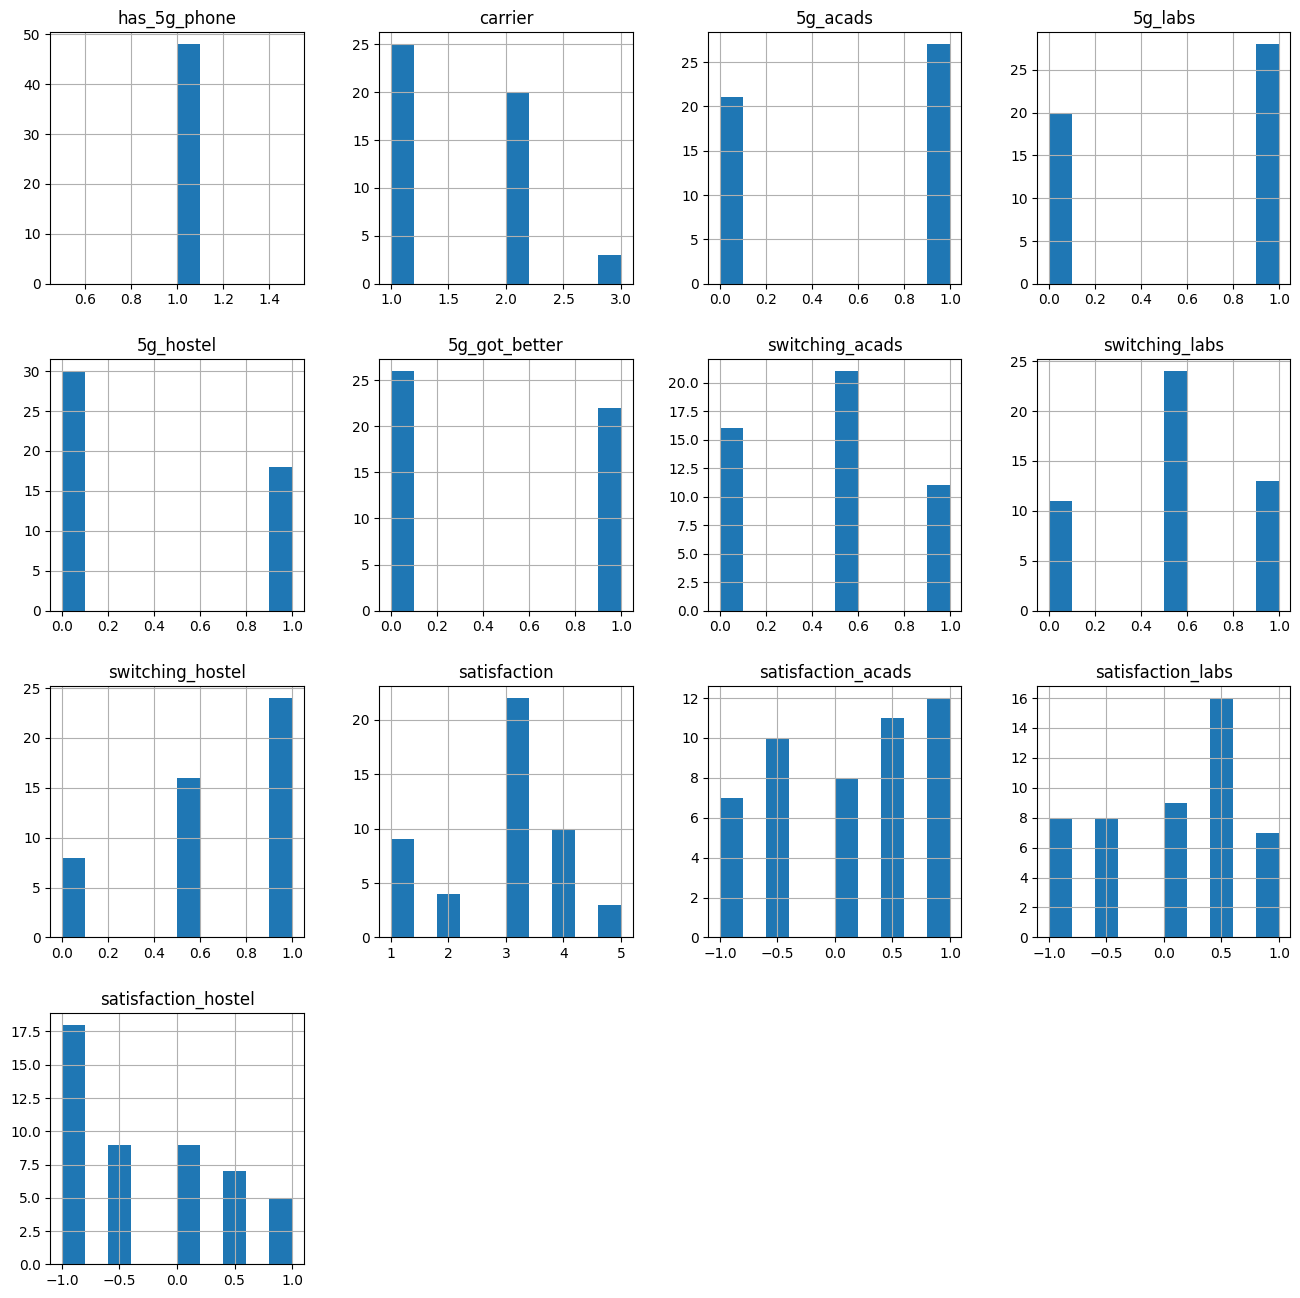

In [23]:
df.hist(figsize=(16,16))

## Which area get's the best 5g service among acads/labs/hostel ?

In [20]:
import seaborn as sns

## Which Hostel gets best 5g service ?

<Axes: xlabel='5g_hostel', ylabel='hostel'>

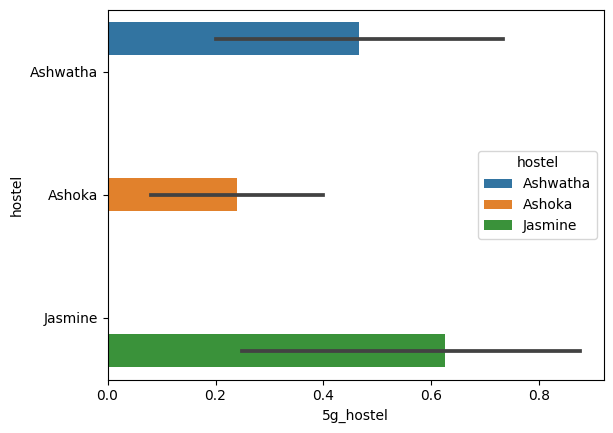

In [21]:
sns.barplot(x="5g_hostel", y="hostel", hue="hostel", data=df)

<Axes: xlabel='satisfaction_hostel', ylabel='hostel'>

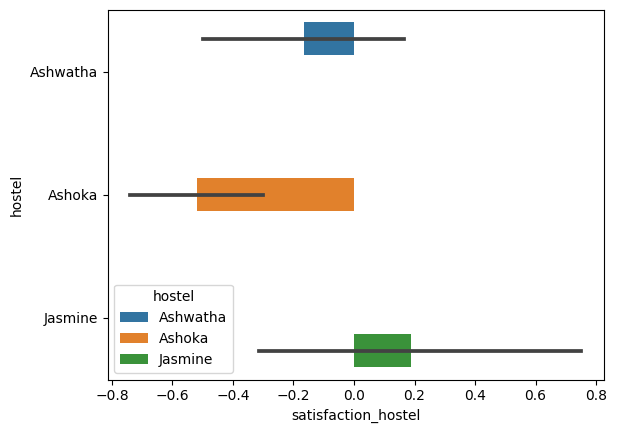

In [22]:
sns.barplot(x="satisfaction_hostel", y="hostel", hue="hostel", data=df)

### Conclusion
- When we only consider the question `do yo get 5g in your hostel ?` Jasmine is the best, followed by Ashwatha and Ashoka.
- When you factor in the question `do you switch to 4g since the 5g signal is low ?` the same trend continues but we can see a serious dip in *satisfaction level* for Ashoka. 
- Jasmine stays on the top and with a positive score, implies many people said the *do* get 5g and they *don't* have to switch to 4g.

## Which Carrier is the best for you ?
To answer this question let's look at the satisfaction level across areas for different carriers